In [28]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [29]:
from matplotlib import rcParams
rcParams.update({
    "font.size": 14})

In [30]:
from BurgersNet import Net
from model_caching import get_model_name

In [31]:
def number_of_parameters(net):
    return sum([len(p) for p in net.parameters()])

In [32]:
def model_name(N_hid=30, N_layers=3, learning_rate=0.001, act_func=nn.Tanh(), epochs=5000):
    return get_model_name(N_hid, N_layers, learning_rate, act_func, epochs)

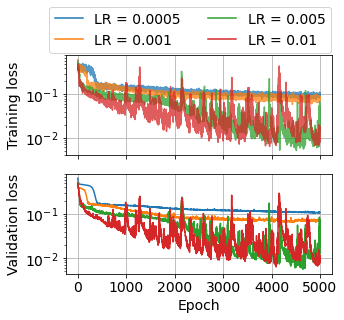

In [33]:
lrs = [0.0005, 0.001, 0.005, 0.01]

f, ax = plt.subplots(2, figsize=(5,4), sharex=True)
for i, lr in enumerate(lrs):
    loss_train, loss_val, loss_test = torch.load('./model/' + model_name(learning_rate=lr) + '_losses.pt')
    plt.subplot(2, 1, 1)
    plt.semilogy(loss_train, alpha=0.75)
    plt.ylabel('Training loss')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogy(loss_val, label='LR = ' + str(lr), alpha=0.75)
    plt.ylabel('Validation loss')
    plt.xlabel('Epoch')
    plt.grid()

ax[0].grid()
ax[1].grid()
f.legend(loc='upper center', bbox_to_anchor=(0.55, 1.14), ncol=2)
plt.tight_layout()
f.savefig('./figs/hyperparams/hyperparam_lr.pdf', dpi=600, bbox_inches = 'tight')
plt.show()


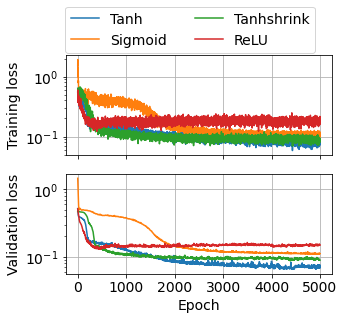

In [34]:
act_funcs = [nn.Tanh(), nn.Sigmoid(), nn.Tanhshrink(), nn.ReLU()]

f, ax = plt.subplots(2, figsize=(5,4), sharex=True)
for i, act_func in enumerate(act_funcs):
    loss_train, loss_val, loss_test = torch.load('./model/' + model_name(act_func = act_func) + '_losses.pt')
    plt.subplot(2, 1, 1)
    plt.semilogy(loss_train, alpha=0.75)
    plt.ylabel('Training loss')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogy(loss_val, label=str(act_func)[:-2], alpha=0.75)
    plt.ylabel('Validation loss')
    plt.xlabel('Epoch')
    plt.grid()

ax[0].grid()
ax[1].grid()
f.legend(loc='upper center', bbox_to_anchor=(0.55, 1.14), ncol=2)
plt.tight_layout()
f.savefig('./figs/hyperparams/hyperparam_act_func.pdf', dpi=600, bbox_inches = 'tight')
plt.show()


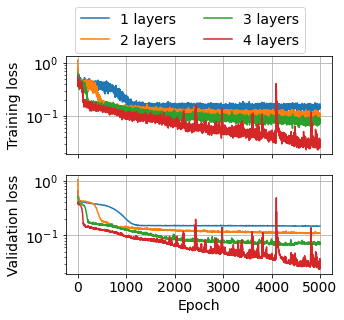

In [35]:
layers = [1, 2, 3, 4]

f, ax = plt.subplots(2, figsize=(5,4), sharex=True)
for i, N_layers in enumerate(layers):
    loss_train, loss_val, loss_test = torch.load('./model/' + model_name(N_layers=N_layers) + '_losses.pt')
    plt.subplot(2, 1, 1)
    plt.semilogy(loss_train, alpha=0.75)
    plt.ylabel('Training loss')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogy(loss_val, label=str(N_layers) + ' layers', alpha=0.75)
    plt.ylabel('Validation loss')
    plt.xlabel('Epoch')
    plt.grid()

ax[0].grid()
ax[1].grid()
f.legend(loc='upper center', bbox_to_anchor=(0.55, 1.14), ncol=2)
plt.tight_layout()
f.savefig('./figs/hyperparams/hyperparam_n_layers.pdf', dpi=600, bbox_inches = 'tight')
plt.show()


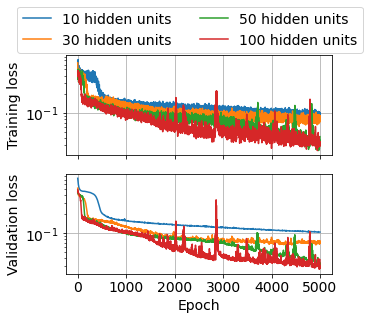

In [36]:
N_hids = [10, 30, 50, 100]

f, ax = plt.subplots(2, figsize=(5,4), sharex=True)
for N_hid in N_hids:
    loss_train, loss_val, loss_test = torch.load('./model/' + model_name(N_hid=N_hid) + '_losses.pt')
    plt.subplot(2, 1, 1)
    plt.semilogy(loss_train)
    plt.ylabel('Training loss')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogy(loss_val, label=str(N_hid) + ' hidden units')
    plt.ylabel('Validation loss')
    plt.xlabel('Epoch')
    plt.grid()

ax[0].grid()
ax[1].grid()
f.legend(loc='upper center', bbox_to_anchor=(0.55, 1.14), ncol=2)
plt.tight_layout()
f.savefig('./figs/hyperparams/hyperparam_n_hid.pdf', dpi=600, bbox_inches = 'tight')
plt.show()
